## Exercise 1.1

In this exercise we will use the Amazon sentiment analysis data (Blitzer et al., 2007), where the goal is to classify text documents as expressing a positive or negative sentiment (i.e., a classification problem with two classes). We are going to focus on book reviews. To load the data, type:

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import lxmls.readers.sentiment_reader as srs
scr = srs.SentimentCorpus("books")

This will load the data in a bag-of-words representation where rare words (occurring less than 5 times in the training data) are removed.

1. Implement the Naive Bayes algorithm. Open the file `multinomial_naive_bayes.py`,  which is inside the classifiers folder. In the MultinomialNaiveBayes class you will find the train method. We have already placed some code in that file to help you get started.
    
2. After implementing, run Naive Bayes with the multinomial model on the Amazon dataset (sentiment classification) and report results both for training and testing

In [15]:
import lxmls.classifiers.multinomial_naive_bayes as mnbb
mnb = mnbb.MultinomialNaiveBayes()
params_nb_sc = mnb.train(scr.train_X,scr.train_y)
y_pred_train = mnb.test(scr.train_X,params_nb_sc)
acc_train = mnb.evaluate(scr.train_y, y_pred_train)
y_pred_test = mnb.test(scr.test_X,params_nb_sc)
acc_test = mnb.evaluate(scr.test_y, y_pred_test)
print("Multinomial Naive Bayes Amazon Sentiment Accuracy train: %f test: %f"%(acc_train,acc_test))

Multinomial Naive Bayes Amazon Sentiment Accuracy train: 0.974375 test: 0.840000


Observe that words that were not observed at training time cause problems at testtime. Why? To  solve this problem, apply a simple add-one smoothing technique:  replace the expression in Eq. 1.9 for the estimation of the conditional probabilities by
    
${\hat P}(w_j|c_k) = \frac{1+\sum_ {m \in \mathcal{I}_k} n_j(x^m)}{J + \sum_{i=1}^J \sum_ {m\in \mathcal{I}_k} n_i(x^m)}.$

where $J$ is the number of distinct words. This is a widely used smoothing strategy which has a Bayesian interpretation: it corresponds to choosing a uniform prior for the word distribution on both classes, and to replace the maximum likelihood criterion by a maximum a posteriori approach. This is a form of regularization, preventing the model from overfitting on the training data. See e.g. for more information. Report the new accuracies.

## Exercise 1.2

We provide an implementation of the perceptron algorithm in the class Perceptron
(file `perceptron.py`).

Run the following commands to generate a simple dataset

In [16]:
%matplotlib inline
import lxmls.readers.simple_data_set as sds
sd = sds.SimpleDataSet(
    nr_examples=100,
    g1=[[-1,-1],1], 
    g2=[[1,1],1], 
    balance=0.5,
    split=[0.5,0,0.5]
)

Run the perceptron algorithm on the simple dataset previously generated and report its train and test set accuracy:

In [17]:
import lxmls.classifiers.perceptron as percc
perc = percc.Perceptron()
params_perc_sd = perc.train(sd.train_X,sd.train_y)
y_pred_train = perc.test(sd.train_X,params_perc_sd)
acc_train = perc.evaluate(sd.train_y, y_pred_train)
y_pred_test = perc.test(sd.test_X,params_perc_sd)
acc_test = perc.evaluate(sd.test_y, y_pred_test)
print("Perceptron Simple Dataset Accuracy train: %f test: %f"%(acc_train, acc_test))

Rounds: 0 Accuracy: 0.900000
Rounds: 1 Accuracy: 1.000000
Rounds: 2 Accuracy: 1.000000
Rounds: 3 Accuracy: 1.000000
Rounds: 4 Accuracy: 1.000000
Rounds: 5 Accuracy: 1.000000
Rounds: 6 Accuracy: 1.000000
Rounds: 7 Accuracy: 1.000000
Rounds: 8 Accuracy: 1.000000
Rounds: 9 Accuracy: 1.000000
Perceptron Simple Dataset Accuracy train: 0.960000 test: 0.960000


[[-1.69314718 -1.69314718]
 [-1.          1.        ]
 [-1.          1.        ]]


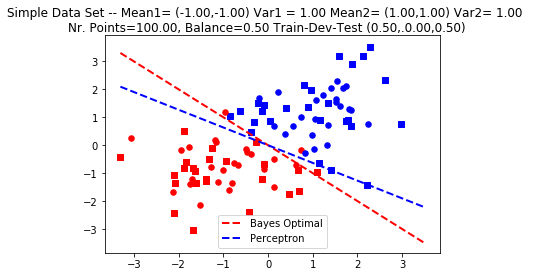

In [18]:
fig, axis = sd.plot_data("osx")
fig, axis = sd.add_line(fig, axis, params_perc_sd, "Perceptron", "blue")

[[-1.69314718 -1.69314718]
 [-1.          1.        ]
 [-1.          1.        ]]


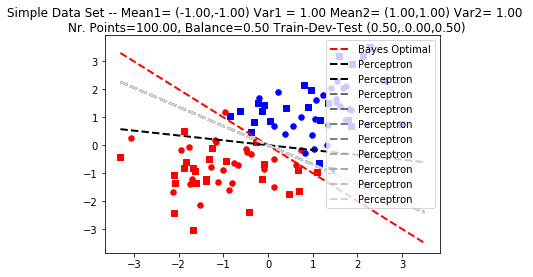

In [19]:
from matplotlib import colors as mcolors


colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]

fig, axis = sd.plot_data("osx")
for i, params in enumerate(perc.params_per_round):
    fig, axis = sd.add_line(fig, axis, params, "Perceptron", sorted_names[i])

Change the code to save the intermediate weight vectors, and plot them every five iterations. What do you observe?

## Exercise 1.3
We provide an implementation of the MIRA algorithm. Compare it with the perceptron for various values of $\lambda$

In [20]:
import lxmls.classifiers.mira as mirac
mira = mirac.Mira()
mira.regularizer = 1.0 # This is lambda
params_mira_sd = mira.train(sd.train_X,sd.train_y)
y_pred_train = mira.test(sd.train_X,params_mira_sd)
acc_train = mira.evaluate(sd.train_y, y_pred_train)
y_pred_test = mira.test(sd.test_X,params_mira_sd)
acc_test = mira.evaluate(sd.test_y, y_pred_test)
print("Mira Simple Dataset Accuracy train: %f test: %f"%(acc_train, acc_test))

Rounds: 0 Accuracy: 0.980000
Rounds: 1 Accuracy: 0.940000
Rounds: 2 Accuracy: 0.940000
Rounds: 3 Accuracy: 0.980000
Rounds: 4 Accuracy: 0.980000
Rounds: 5 Accuracy: 0.940000
Rounds: 6 Accuracy: 0.920000
Rounds: 7 Accuracy: 0.940000
Rounds: 8 Accuracy: 1.000000
Rounds: 9 Accuracy: 1.000000
Mira Simple Dataset Accuracy train: 1.000000 test: 0.960000


Compare the results achieved and separating hiperplanes found.

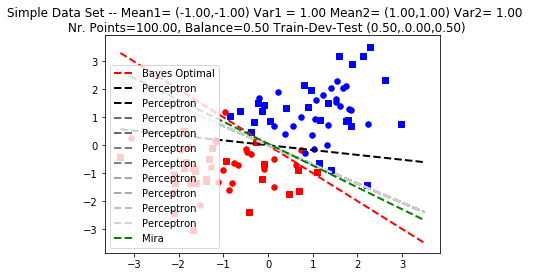

In [21]:
fig, axis = sd.add_line(fig, axis, params_mira_sd, "Mira","green")
fig

## Exercise 1.4
We provide an implementation of the L-BFGS algorithm for training maximum entropy models in the class MaxEnt batch, as well as an implementation of the SGD algorithm in the class `MaxEnt online`.

Objective = 0.6931471805599453
Objective = 0.6975612499276491
Objective = 0.4555754377596401
Objective = 0.45544739525546596
Objective = 0.45542384019232723
Objective = 0.45542375924295664
Objective = 0.4554237572145117
Max-Ent batch Simple Dataset Accuracy train: 0.980000 test: 0.960000


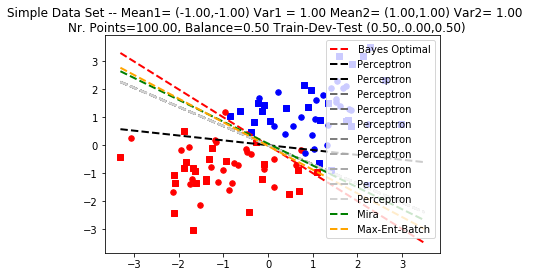

In [22]:
import lxmls.classifiers.max_ent_batch as mebc
me_lbfgs = mebc.MaxEntBatch()
me_lbfgs.regularizer = 1.0
params_meb_sd = me_lbfgs.train(sd.train_X,sd.train_y)
y_pred_train = me_lbfgs.test(sd.train_X,params_meb_sd)
acc_train = me_lbfgs.evaluate(sd.train_y, y_pred_train)
y_pred_test = me_lbfgs.test(sd.test_X,params_meb_sd)
acc_test = me_lbfgs.evaluate(sd.test_y, y_pred_test)
print(
    "Max-Ent batch Simple Dataset Accuracy train: %f test: %f" % 
    (acc_train,acc_test)
)
fig, axis = sd.add_line(fig, axis, params_meb_sd, "Max-Ent-Batch","orange")
fig

Train a maximum entropy model using L-BFGS, on the Amazon dataset (try different values of $\lambda$) and report training and test set accuracy. What do you observe?

In [23]:
params_meb_sc = me_lbfgs.train(scr.train_X,scr.train_y)
y_pred_train = me_lbfgs.test(scr.train_X,params_meb_sc)
acc_train = me_lbfgs.evaluate(scr.train_y, y_pred_train)
y_pred_test = me_lbfgs.test(scr.test_X,params_meb_sc)
acc_test = me_lbfgs.evaluate(scr.test_y, y_pred_test)
print(
    "Max-Ent Batch Amazon Sentiment Accuracy train: %f test: %f" % 
    (acc_train, acc_test)
)

Objective = 0.6931471805599452
Objective = 2.3569935918850327
Objective = 0.684446278347706
Objective = 0.6624653397269713
Objective = 0.6369050882978826
Objective = 0.6279555562071627
Objective = 0.6242854266098836
Objective = 0.6226210165612385
Objective = 0.6225118183216436
Objective = 0.6224325438719657
Objective = 0.6224098226931887
Objective = 0.6224035006188005
Objective = 0.622402924504082
Objective = 0.62240279613179
Objective = 0.6224027875941003
Objective = 0.6224027809592892
Objective = 0.6224027960617738
Objective = 0.6224027798482332
Max-Ent Batch Amazon Sentiment Accuracy train: 0.858125 test: 0.790000


Now, fix $\lambda$ = 1.0 and train with SGD (you might try to adjust the initial step). Compare the objective values obtained during training with those obtained with L-BFGS. What do you observe?

In [24]:
import lxmls.classifiers.max_ent_online as meoc
me_sgd = meoc.MaxEntOnline()
me_sgd.regularizer = 1.0
params_meo_sc = me_sgd.train(scr.train_X,scr.train_y)
y_pred_train = me_sgd.test(scr.train_X,params_meo_sc)
acc_train = me_sgd.evaluate(scr.train_y, y_pred_train)
y_pred_test = me_sgd.test(scr.test_X,params_meo_sc)
acc_test = me_sgd.evaluate(scr.test_y, y_pred_test)
print(
    "Max-Ent Online Amazon Sentiment Accuracy train: %f test: %f" % 
    (acc_train, acc_test)
)

Epochs: 0 Objective: 1.449590
Epochs: 0 Accuracy: 0.846875
Epochs: 1 Objective: 0.643229
Epochs: 1 Accuracy: 0.858750
Epochs: 2 Objective: 0.633205
Epochs: 2 Accuracy: 0.859375
Epochs: 3 Objective: 0.629873
Epochs: 3 Accuracy: 0.860000
Epochs: 4 Objective: 0.628213
Epochs: 4 Accuracy: 0.860000
Epochs: 5 Objective: 0.627210
Epochs: 5 Accuracy: 0.860000
Epochs: 6 Objective: 0.626526
Epochs: 6 Accuracy: 0.859375
Epochs: 7 Objective: 0.626022
Epochs: 7 Accuracy: 0.858750
Epochs: 8 Objective: 0.625632
Epochs: 8 Accuracy: 0.859375
Epochs: 9 Objective: 0.625319
Epochs: 9 Accuracy: 0.860000
Max-Ent Online Amazon Sentiment Accuracy train: 0.860000 test: 0.795000


## Exercise 1.5
Run the SVM primal algorithm. Then, repeat the MaxEnt exercise now using SVMs, for several values of $\lambda$:

In [25]:
import lxmls.classifiers.svm as svmc
svm = svmc.SVM()
svm.regularizer = 1.0 # This is lambda
params_svm_sd = svm.train(sd.train_X,sd.train_y)
y_pred_train = svm.test(sd.train_X,params_svm_sd)
acc_train = svm.evaluate(sd.train_y, y_pred_train)
y_pred_test = svm.test(sd.test_X,params_svm_sd)
acc_test = svm.evaluate(sd.test_y, y_pred_test)
print("SVM Online Simple Dataset Accuracy train: {} test: {}".format(acc_train,acc_test))

Epochs: 0 Objective: 0.545698
Epochs: 0 Accuracy: 0.940000
Epochs: 1 Objective: 0.392799
Epochs: 1 Accuracy: 0.980000
Epochs: 2 Objective: 0.379019
Epochs: 2 Accuracy: 0.980000
Epochs: 3 Objective: 0.374794
Epochs: 3 Accuracy: 0.960000
Epochs: 4 Objective: 0.372746
Epochs: 4 Accuracy: 0.940000
Epochs: 5 Objective: 0.371416
Epochs: 5 Accuracy: 0.940000
Epochs: 6 Objective: 0.370676
Epochs: 6 Accuracy: 0.940000
Epochs: 7 Objective: 0.370046
Epochs: 7 Accuracy: 0.940000
Epochs: 8 Objective: 0.369570
Epochs: 8 Accuracy: 0.940000
Epochs: 9 Objective: 0.369198
Epochs: 9 Accuracy: 0.940000
SVM Online Simple Dataset Accuracy train: 0.94 test: 0.96


In [26]:
fig,axis = sd.add_line(fig,axis,params_svm_sd,"SVM","orange")
params_svm_sc = svm.train(scr.train_X,scr.train_y)
y_pred_train = svm.test(scr.train_X,params_svm_sc)
acc_train = svm.evaluate(scr.train_y, y_pred_train)
y_pred_test = svm.test(scr.test_X,params_svm_sc)
acc_test = svm.evaluate(scr.test_y, y_pred_test)
print("SVM Online Amazon Sentiment Accuracy train: {} test: {}".format(acc_train,acc_test))

Epochs: 0 Objective: 1.512689
Epochs: 0 Accuracy: 0.825000
Epochs: 1 Objective: 0.800713
Epochs: 1 Accuracy: 0.861250
Epochs: 2 Objective: 0.765247
Epochs: 2 Accuracy: 0.870625
Epochs: 3 Objective: 0.748420
Epochs: 3 Accuracy: 0.873750
Epochs: 4 Objective: 0.742675
Epochs: 4 Accuracy: 0.880000
Epochs: 5 Objective: 0.736711
Epochs: 5 Accuracy: 0.883125
Epochs: 6 Objective: 0.733872
Epochs: 6 Accuracy: 0.878750
Epochs: 7 Objective: 0.730902
Epochs: 7 Accuracy: 0.876875
Epochs: 8 Objective: 0.729642
Epochs: 8 Accuracy: 0.880625
Epochs: 9 Objective: 0.728029
Epochs: 9 Accuracy: 0.881875
SVM Online Amazon Sentiment Accuracy train: 0.881875 test: 0.81


Compare the results achieved and separating hiperplanes found.

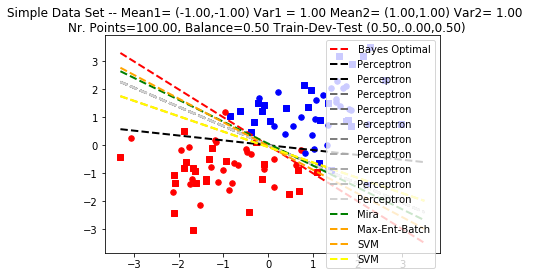

In [27]:
fig, axis = sd.add_line(fig, axis, params_svm_sd, "SVM", "yellow")
fig